<class 'numpy.ndarray'>
(1797, 64)
각 이미지의 픽셀 값 평균 :  [4.59375  4.890625 5.375    ... 5.84375  5.375    6.125   ]


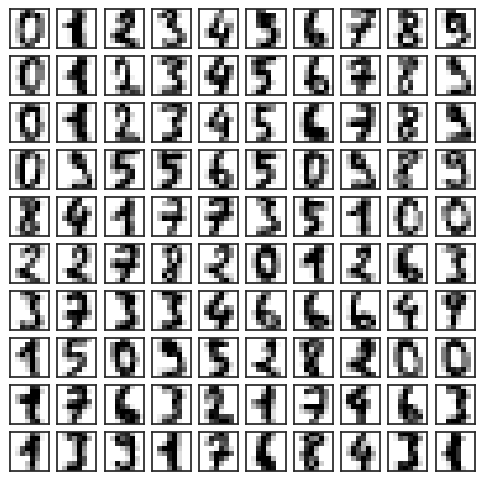

In [165]:
#a) 데이터 이해 및 기본 처리
#digits.data를 NumPy 배열로 확인하고 배열의 shape, 데이터 타입 등을 출력해 보세요.
#각 샘플 이미지 데이터를 8x8 배열로 변환하여 특정 샘플 이미지를 시각화해 보세요.
#각 이미지의 픽셀 값 평균을 구하세요.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
print(type(digits.data))
print(digits.data.shape)

fig, ax = plt.subplots(10,10,figsize=(6,6))
for i,axi in enumerate(ax.flat):
  axi.imshow(digits.images[i],cmap='binary')
  axi.set(xticks=[], yticks=[])

print("각 이미지의 픽셀 값 평균 : ", np.mean(digits.data,axis=1))


In [166]:
print(np.unique(digits.target))
print((digits.target ==3).sum())

[0 1 2 3 4 5 6 7 8 9]
183


In [167]:
#b) 숫자 필터링
#타겟 값(target)이 특정 숫자(예: 3)인 샘플만 필터링하여 별도의 배열로 저장하세요.
#필터링된 샘플의 평균 픽셀 값을 계산하세요.
digit3 = digits.data[digits.target ==3]
np.mean(digit3,axis=1)

array([4.171875, 5.015625, 4.46875 , 4.390625, 4.28125 , 4.3125  ,
       5.09375 , 5.109375, 4.1875  , 4.9375  , 5.140625, 5.453125,
       4.046875, 4.015625, 5.40625 , 4.046875, 4.703125, 4.921875,
       4.375   , 4.28125 , 4.140625, 4.71875 , 5.      , 4.6875  ,
       4.875   , 4.375   , 4.375   , 5.40625 , 4.046875, 5.515625,
       5.59375 , 4.859375, 5.296875, 5.21875 , 5.21875 , 5.203125,
       4.765625, 4.75    , 4.078125, 4.203125, 4.984375, 5.328125,
       4.921875, 5.328125, 5.265625, 5.09375 , 4.71875 , 4.703125,
       4.953125, 4.890625, 4.8125  , 5.125   , 4.921875, 4.34375 ,
       4.453125, 4.03125 , 4.171875, 4.609375, 4.328125, 5.78125 ,
       4.015625, 4.6875  , 4.09375 , 4.3125  , 4.5625  , 4.578125,
       5.40625 , 5.265625, 5.421875, 4.0625  , 5.21875 , 5.40625 ,
       4.796875, 5.375   , 5.390625, 4.5     , 4.046875, 4.1875  ,
       5.625   , 4.      , 4.6875  , 4.375   , 4.796875, 4.578125,
       5.40625 , 5.21875 , 5.328125, 4.171875, 4.265625, 4.5  

In [168]:
#c) 데이터 변환
#모든 픽셀 값을 0~1 사이로 정규화하세요.
min_max_normal = digits.data / digits.data.max()
print(np.min(min_max_normal) , np.max(min_max_normal))
print(min_max_normal.shape)


0.0 1.0
(1797, 64)


(array([60367.,  6240.,  3261.,  5362.,  2627.,  6049.,  5556.,  3668.,
         7118., 14760.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

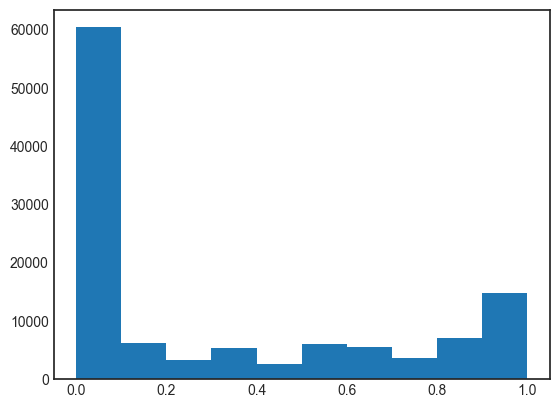

In [169]:
plt.hist(min_max_normal.flatten())

In [170]:
dir(digits)
digits.data.shape

(1797, 64)

In [174]:
#a) 데이터프레임 생성 및 탐색
#digits.data와 digits.target을 결합하여 Pandas DataFrame을 생성하세요.
#각 숫자(0~9)가 몇 개씩 포함되어 있는지 확인하세요.
import pandas as pd
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df['target'].value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [180]:
#b) 숫자별 통계
#각 숫자(0~9)에 대해 평균 픽셀 값을 계산하여 새로운 DataFrame으로 나타내세요.
#숫자별로 가장 밝은(최대 픽셀 값이 높은) 이미지를 찾으세요.
df['mean'] = df.iloc[:,:64].mean(axis=1)
max = df.groupby(df.target)['mean'].max()
indexMax = df.groupby(df.target)['mean'].idxmax()

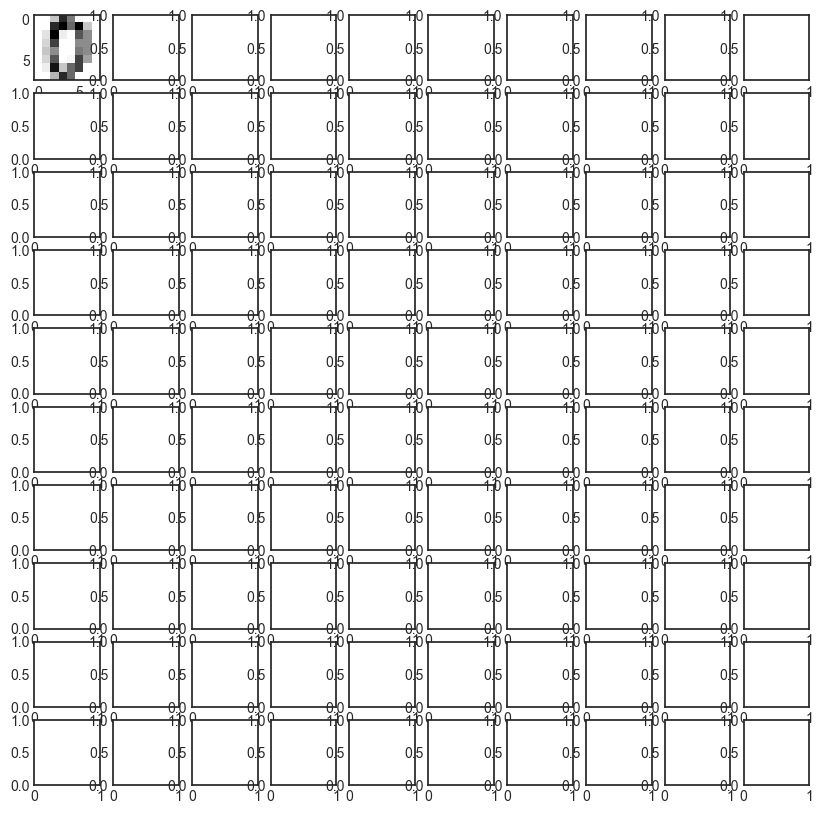

In [185]:
#c) 데이터 시각화
#각 숫자(0~9)에 대해 샘플 이미지를 시각화하는 함수 plot_sample_images를 작성하세요.
#숫자별 픽셀 값 분포를 박스 플롯(Box plot)으로 그리세요.
digits.images[digits.target ==0].shape

fig, axes = plt.subplots(10,10,figsize=(10,10))
axes[0,0].imshow(digits.images[0])


load_digits 데이터셋은 손글씨 숫자 이미지를 포함한 8x8 픽셀 데이터를 제공하는 간단한 데이터셋: 교재 300

NumPy 실습 과제
a) 데이터 이해 및 기본 처리
digits.data를 NumPy 배열로 확인하고 배열의 shape, 데이터 타입 등을 출력해 보세요.
각 샘플 이미지 데이터를 8x8 배열로 변환하여 특정 샘플 이미지를 시각화해 보세요.
각 이미지의 픽셀 값 평균을 구하세요.

b) 숫자 필터링
타겟 값(target)이 특정 숫자(예: 3)인 샘플만 필터링하여 별도의 배열로 저장하세요.
필터링된 샘플의 평균 픽셀 값을 계산하세요.

c) 데이터 변환
모든 픽셀 값을 0~1 사이로 정규화하세요.

Pandas 실습 과제
a) 데이터프레임 생성 및 탐색
digits.data와 digits.target을 결합하여 Pandas DataFrame을 생성하세요.
각 숫자(0~9)가 몇 개씩 포함되어 있는지 확인하세요.

b) 숫자별 통계
각 숫자(0~9)에 대해 평균 픽셀 값을 계산하여 새로운 DataFrame으로 나타내세요.
숫자별로 가장 밝은(최대 픽셀 값이 높은) 이미지를 찾으세요.

c) 데이터 시각화
각 숫자(0~9)에 대해 샘플 이미지를 시각화하는 함수 plot_sample_images를 작성하세요.
숫자별 픽셀 값 분포를 박스 플롯(Box plot)으로 그리세요.


종합 과제
a) 이미지 분류 모델
DataFrame에서 target 열을 제외한 데이터를 NumPy 배열로 변환하세요.
분류를 위해 데이터를 훈련 세트와 테스트 세트로 나누세요.
간단한 k-NN 또는 SVM 모델을 사용하여 숫자를 분류하는 코드를 작성하세요.

b) EDA(탐색적 데이터 분석)
각 숫자의 평균 이미지를 생성하여 시각화하세요.
숫자별로 데이터의 분포를 비교하는 히스토그램을 작성하세요.

5장 과제
PCA를 사용한 차원 축소: digits.data의 차원을 줄여 2D 또는 3D로 시각화하세요.

군집화: K-Means 알고리즘을 사용하여 데이터 포인트를 10개의 클러스터로 나누고 결과를 시각화하세요.